In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, AveragePooling2D, MaxPooling2D,Dropout

In [ ]:
data_Bl=np.load('/content/bloodmnist.npz')
data_Br=np.load('/content/breastmnist.npz')

train_xbl= data_Bl['train_images']/255.0
train_ybl= data_Bl['train_labels']
test_xbl= data_Bl['test_images']/255.0
test_ybl= data_Bl['test_labels']
val_xbl= data_Bl['val_images']/255.0
val_ybl= data_Bl['val_labels']

#Meaning of labels: {'0': 'basophil', 
#                    '1': 'eosinophil', 
#                     '2': 'erythroblast', 
#                     '3': 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)', 
#                     '4': 'lymphocyte', 
#                     '5': 'monocyte', 
#                     '6': 'neutrophil', 
#                     '7': 'platelet'}

print('Blood Dataset:')
print('Classes: ',np.unique(train_ybl))
print('Input shape: ',train_xbl[0].shape)

print('Null values in Train Blood dataset - ',np.isnan(train_xbl).any())
print('Null values in Train Blood labels - ',np.isnan(train_ybl).any())
print('Null values in Test Blood dataset - ',np.isnan(test_xbl).any())
print('Null values in Test Blood labels - ',np.isnan(test_ybl).any())
print('Null values in Validation Blood dataset - ',np.isnan(val_xbl).any())
print('Null values in Validation Blood labels - ',np.isnan(val_ybl).any())

train_xbr= data_Br['train_images']/255.0
train_ybr= data_Br['train_labels']
test_xbr= data_Br['test_images']/255.0
test_ybr= data_Br['test_labels']
val_xbr= data_Br['val_images']/255.0
val_ybr= data_Br['val_labels']



print('Breast Dataset:')
print('Classes: ',np.unique(train_ybr))
print('Input shape: ',train_xbr[0].shape)


print('Null values in Train Breast dataset - ',np.isnan(train_xbr).any())
print('Null values in Train Breast labels - ',np.isnan(train_ybr).any())
print('Null values in Test Breast dataset - ',np.isnan(test_xbr).any())
print('Null values in Test Breast labels - ',np.isnan(test_ybr).any())
print('Null values in Validation Breast dataset - ',np.isnan(val_xbr).any())
print('Null values in Validation Breast labels - ',np.isnan(val_ybr).any())

Blood Dataset:
Classes:  [0 1 2 3 4 5 6 7]
Input shape:  (28, 28, 3)
Null values in Train Blood dataset -  False
Null values in Train Blood labels -  False
Null values in Test Blood dataset -  False
Null values in Test Blood labels -  False
Null values in Validation Blood dataset -  False
Null values in Validation Blood labels -  False
Breast Dataset:
Classes:  [0 1]
Input shape:  (28, 28)
Null values in Train Breast dataset -  False
Null values in Train Breast labels -  False
Null values in Test Breast dataset -  False
Null values in Test Breast labels -  False
Null values in Validation Breast dataset -  False
Null values in Validation Breast labels -  False


In [ ]:
train_xbl=train_xbl.reshape(len(train_xbl),28*28*3)
print(train_xbl.shape)

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
train_xbl_resampled, train_ybl_resampled = ros.fit_resample(train_xbl, train_ybl)

train_xbl_re=train_xbl_resampled.reshape(18640,28,28,3)



(11959, 2352)


In [ ]:
unique, counts = np.unique(train_ybl,return_counts=True)
dict(zip(unique,counts))

{0: 852, 1: 2181, 2: 1085, 3: 2026, 4: 849, 5: 993, 6: 2330, 7: 1643}

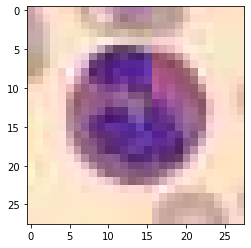

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_xbl_re[65],cmap='ocean')
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(16,kernel_size=(3,3),padding='valid', activation='relu',input_shape=(28,28,3)))
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu',input_shape=(28,28,3)))
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid', activation='relu',input_shape=(28,28,3)))
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))

#model.add(Conv2D(128,kernel_size=(3,3),padding='valid', activation='relu',input_shape=(28,28,3)))
#model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
#model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='softmax'))

In [ ]:
model.summary()
train_xbl_re.shape

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 26, 26, 16)        448       
                                                                 
 average_pooling2d_13 (Avera  (None, 13, 13, 16)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_25 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 average_pooling2d_14 (Avera  (None, 5, 5, 32)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_26 (Conv2D)          (None, 3, 3, 64)          18496     
                                                                 
 average_pooling2d_15 (Avera  (None, 1, 1, 64)        

(18640, 28, 28, 3)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history1 = model.fit(x=train_xbl_re, y=train_ybl_resampled, epochs=75, validation_data=(val_xbl, val_ybl), batch_size=50)

Epoch 1/75


ValueError: ignored

In [ ]:
from sklearn.preprocessing import label_binarize

y_pred_prob= model.predict(test_xbl,verbose=0)
y_pred=np.rint(y_pred_prob)
y_true=label_binarize(test_ybl, classes=[0,1,2,3,4,5,6,7])


print(y_pred)
print(y_true)

#https://machinelearningmastery.com/how-to-calculate-precision-recall-f1-and-more-for-deep-learning-models/
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.label_binarize.html
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.multilabel_confusion_matrix.html

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

## accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_true, y_pred)
print('Accuracy: %.2f ' % (accuracy*100))

## precision tp / (tp + fp)
precision = precision_score(y_true, y_pred,average='weighted')
print('Precision: %.2f ' % (precision*100))

## recall: tp / (tp + fn)
recall = recall_score(y_true, y_pred,average='weighted')
print('Recall: %.2f ' % (recall*100))

## f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_true, y_pred,average='weighted')
print('F1 score: %.2f ' % (f1*100))
 
## ROC AUC
auc = roc_auc_score(y_true, y_pred_prob)
print('ROC AUC: %.2f' % auc)

## confusion matrix
matrix = confusion_matrix(y_true, y_pred,)
# mat_df=pd.DataFrame(matrix, index=['basophil','eosinophil','erythroblast','immature granulocytes', 'lymphocyte','monocyte','neutrophil','platelet'],
#                     columns=['basophil','eosinophil','erythroblast','immature granulocytes', 'lymphocyte','monocyte','neutrophil','platelet'])

# plt.figure(figsize=(9,8))
# sns.heatmap(cm_df, annot=True)
# plt.title('Confusion Matrix')
# plt.ylabel('Actal Values')
# plt.xlabel('Predicted Values')
# plt.show()

[[0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]
Accuracy: 92.55 
Precision: 92.71 
Recall: 92.55 
F1 score: 92.61 
ROC AUC: 0.99


ValueError: ignored

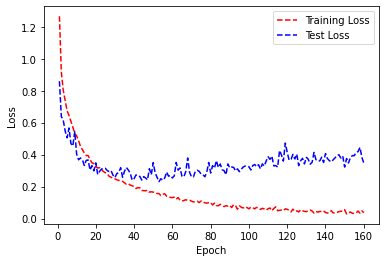

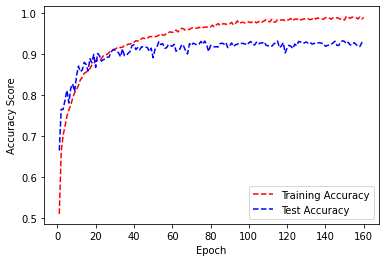

In [ ]:

training_loss = history1.history['loss']
test_loss = history1.history['val_loss']

epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b--")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

training_accuracy = history1.history["accuracy"]
test_accuracy = history1.history["val_accuracy"]

plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b--")
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show()

In [ ]:
#Neural Network
NN=Sequential()

#Defining a Model
NN.add(Conv2D(16,kernel_size=(3,3),padding='valid',input_shape=(28,28,3), activation='sigmoid'))
NN.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

NN.add(Conv2D(32,kernel_size=(3,3),padding='valid', activation='sigmoid'))
NN.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

NN.add(Conv2D(64,kernel_size=(3,3),padding='valid', activation='sigmoid'))
NN.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

NN.add(Flatten())

NN.add(Dense(64,activation='sigmoid'))
NN.add(Dense(32,activation='sigmoid'))
NN.add(Dense(16,activation='sigmoid'))
NN.add(Dense(8, activation='softmax'))



#Compiling model
#https://towardsdatascience.com/cross-entropy-loss-function-f38c4ec8643e#:~:text=Categorical%20cross%2Dentropy%20is%20used,%5D%20for%203%2Dclass%20problem.
NN.compile (loss='sparse_categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

history=NN.fit(x=train_xbl_re,
                    y=train_ybl_resampled,
                    epochs=60,
                    verbose=1,
                    batch_size=50,
                    validation_data=(val_xbl,val_ybl))

NN.summary()

Epoch 1/60
373/373 [==============================] - 6s 6ms/step - loss: 2.0873 - accuracy: 0.1230 - val_loss: 2.0731 - val_accuracy: 0.1694
Epoch 2/60
365/373 [============================>.] - ETA: 0s - loss: 1.9788 - accuracy: 0.1898

KeyboardInterrupt: ignored

In [ ]:
y_pred_prob= NN.predict(test_xbl,verbose=0)
y_pred=np.round(y_pred_prob)
y_true=label_binarize(test_ybl, classes=[0,1,2,3,4,5,6,7])

## accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_true, y_pred)
print('Accuracy: %.2f ' % (accuracy*100))

## precision tp / (tp + fp)
precision = precision_score(y_true, y_pred,average='weighted')
print('Precision: %.2f ' % (precision*100))

## recall: tp / (tp + fn)
recall = recall_score(y_true, y_pred,average='weighted')
print('Recall: %.2f ' % (recall*100))

## f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_true, y_pred,average='weighted')
print('F1 score: %.2f ' % (f1*100))
 
## ROC AUC
auc = roc_auc_score(y_true, y_pred_prob)
print('ROC AUC: %.2f' % auc)

## confusion matrix
matrix = multilabel_confusion_matrix(y_true, y_pred,)
print(matrix)

Accuracy: 89.71 
Precision: 90.32 
Recall: 89.71 
F1 score: 89.97 
ROC AUC: 0.99
[[[3123   54]
  [  41  203]]

 [[2786   11]
  [  16  608]]

 [[3086   24]
  [  35  276]]

 [[2720  122]
  [ 123  456]]

 [[3131   47]
  [  15  228]]

 [[3085   52]
  [  79  205]]

 [[2736   19]
  [  39  627]]

 [[2948    3]
  [   4  466]]]


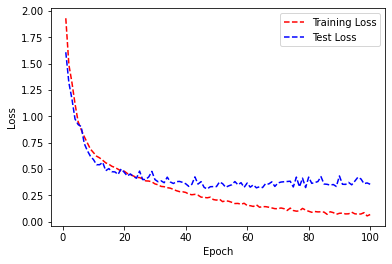

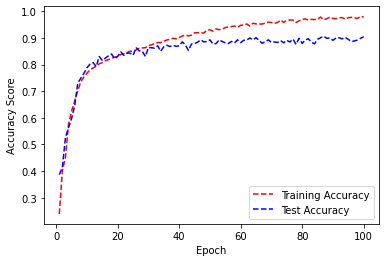

In [ ]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']

epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b--")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b--")
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show()

In [ ]:
!pip install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

from autokeras import StructuredDataClassifier

In [ ]:
train_xbl_pre=data_Bl['train_images']
#train_xbl_v= train_xbl_pre/255.0
print(train_xbl_pre[0].shape)

test_xbl_pre=data_Bl['test_images']
#test_xbl_v= tes_xbl_pre/255.0

val_xbl_pre= data_Bl['val_images']
#val_xbl_v=val_xbl_pre/255.0

(28, 28, 3)


In [ ]:
train_xbl_v=tf.pad(tensor=train_xbl_pre, paddings=[[0,0],[2,2],[2,2],[0,0]])
train_xbl_v[0].shape

val_xbl_v=tf.pad(tensor=val_xbl_pre, paddings=[[0,0],[2,2],[2,2],[0,0]])
val_xbl_v[0].shape

test_xbl_v=tf.pad(tensor=test_xbl_pre, paddings=[[0,0],[2,2],[2,2],[0,0]])
test_xbl_v[0].shape

TensorShape([32, 32, 3])

In [ ]:
from keras.applications import vgg19
model_v=vgg19.VGG19(input_shape=(32,32,3),classes=8,include_top=False)
model_v.trainable = False
model_v.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
y_pred=model_v.predict(test_xbl_v)
print(y_pred[0])
print(test_ybl[0])

107/107 [==============================] - 1s 9ms/step
[[[  0.          0.          0.          0.          0.
     0.          1.4573977   0.          0.          0.
     0.          0.          0.          0.          0.
     0.          0.          0.          0.          0.
     0.          0.          0.          0.          0.
     0.          0.          0.         16.58071     0.
     0.          0.          0.          0.          0.
     0.          0.          0.          0.          0.
     0.          0.          0.          9.322914    0.
     2.4557981   0.          0.          0.          0.
     0.          0.          0.         14.337022    0.
     0.          0.         62.130096    0.          0.
     0.          0.          0.          0.          0.
     0.          0.          0.          0.          0.
     0.          0.          0.          7.6045465   6.8343596
     0.          0.          0.          0.         52.31454
     0.          0.          0.      

In [ ]:
model_v.fit(x=train_xbl_v,y=train_ybl, epochs=20, verbose=1, batch_size=300, validation_data=(val_xbl_v,val_ybl))

Epoch 1/20
25/40 [=================>............] - ETA: 0s - loss: 19.0071 - accuracy: 0.0000e+00

KeyboardInterrupt: ignored